In [1]:
using Distributions, Plots, KernelDensity

# Estimación con histogramas

Sabemos que dada una función de densidad de probabilidad $f$ y $X\sim \mathcal{L}(f)$

$$
f(x) =\lim_{h\to 0 } \frac{1}{2h}\mathbb{P}\left[ x-h < X < x+h \right]
$$

Por otro lado  dada una muestra $X_1,\ldots , X_n\stackrel{\text{i.i.d.}}{\sim}\mathcal{L}(f)$, por Monte-Carlo se tiene la paroximación

$$
\mathbb{P}\left[ x-h < X < x+h \right] \approx \frac{\#\left\{ 1\leq i \leq n \, : \,  X_i\in \left(x-h,x+h\right) \right\}}{n}
$$

Lo cual motiva el uso para $h$ pequeño de

$$
\hat{f}(x) = \frac{\#\left\{ 1\leq i \leq n \, : \,  X_i\in \left(x-h,x+h\right) \right\}}{2hn} \approx f(x)
$$

Si definimos 

$$
w(x)=\begin{cases}
\frac{1}{2} & \text{si } |x|<1
\\
0 & \text{en otro caso.}
\end{cases}
$$

con lo que 

$$
\hat{f}(x) =\frac{1}{n}\sum_{i=1}^{n}\frac{1}{h}w\left( \frac{x-X_i}{h} \right)
$$

In [2]:
D = MixtureModel( Normal[ Normal(0,1), Normal(5,1)],  [0.3,0.7])

MixtureModel{Normal}(K = 2)
components[1] (prior = 0.3000): Normal{Float64}(μ=0.0, σ=1.0)
components[2] (prior = 0.7000): Normal{Float64}(μ=5.0, σ=1.0)


In [3]:
n = 200
X = rand(D,n);

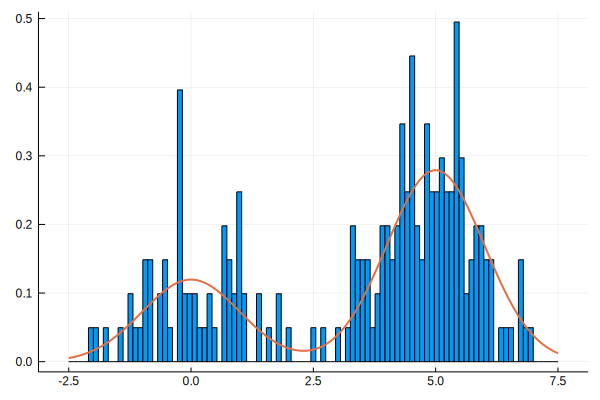

In [15]:
hist = histogram(X,bins=LinRange(-2.5,7.5,100),normalize=true,label="")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="")

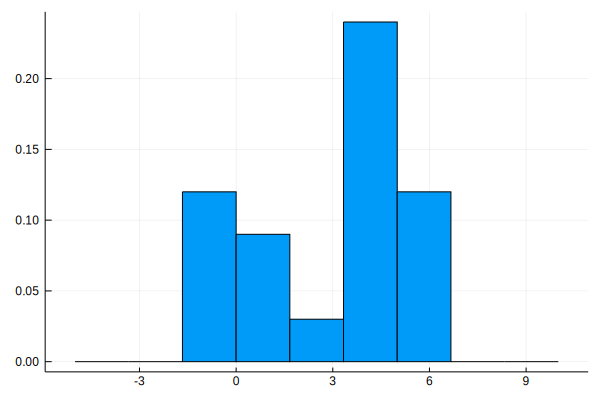

In [5]:
n = 20
X = rand(D,n)
hist = histogram(X,bins=LinRange(-5,10,10),normalize=true,label="")

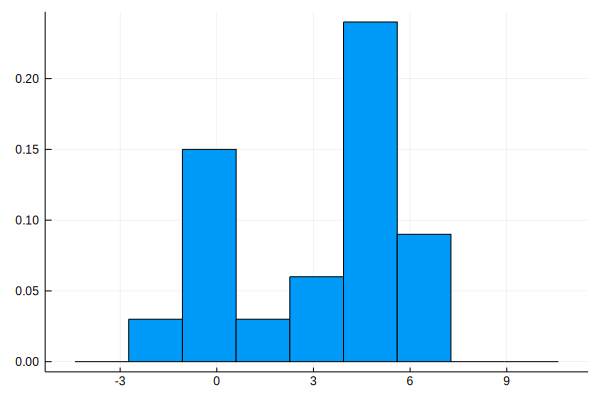

In [6]:
hist = histogram(X,bins=LinRange(-5,10,10) .+ 0.6,normalize=true,label="")

# Estimación con Kernels

Consideramos un kernel $K(x)$ tal que $\int_{-\infty}^{\infty} K(x) \mathrm{d}x = 1$ y definimos en analogía al histograma el estimador

$$
\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^n K\left( \frac{x-X_i}{h} \right)
$$

In [7]:
n = 200
X = rand(D,n);

In [8]:
kerdens = kde(X,bandwidth=0.5);

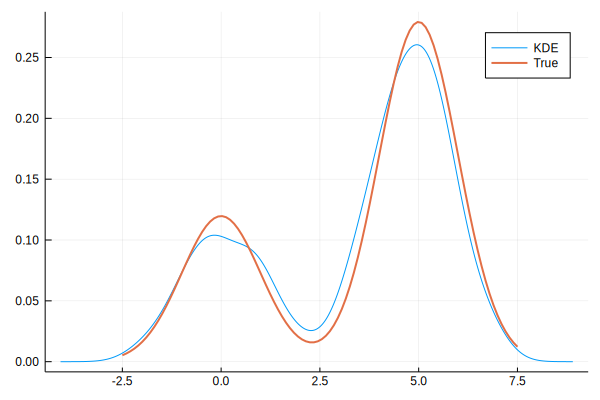

In [9]:
plot(kerdens.x, kerdens.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

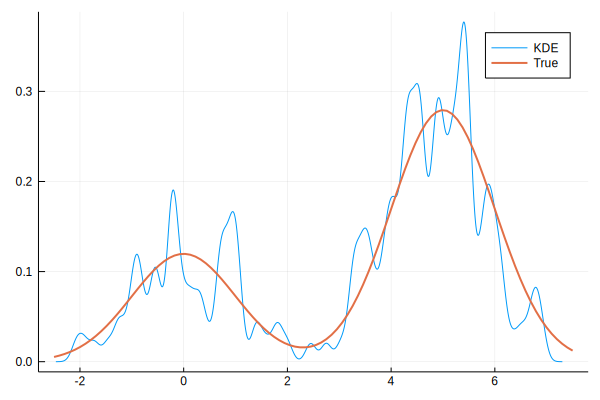

In [10]:
kerdens = kde(X,bandwidth=0.1)
plot(kerdens.x, kerdens.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

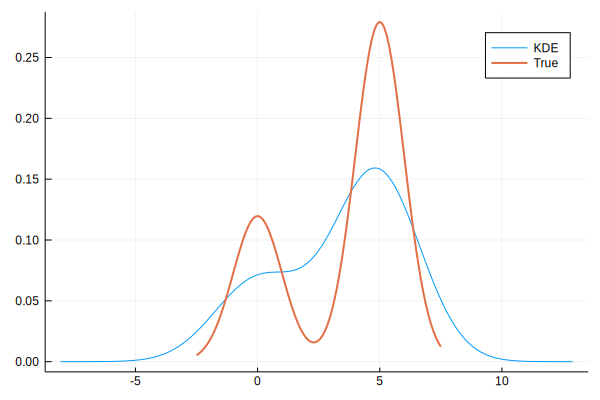

In [11]:
kerdens = kde(X,bandwidth=1.5)
plot(kerdens.x, kerdens.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

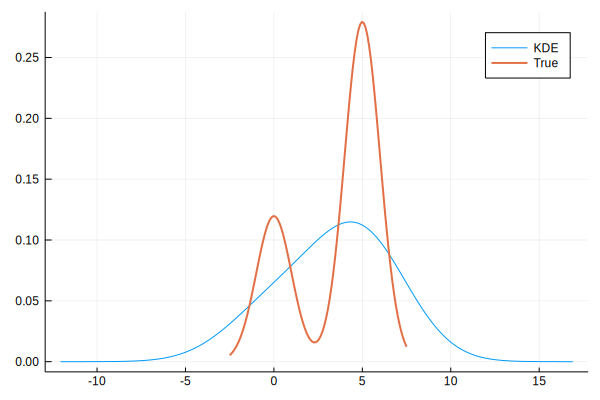

In [12]:
kerdens = kde(X,bandwidth=2.5)
plot(kerdens.x, kerdens.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

## Ancho de banda óptimo

Definimos el error cuadrático integrado medio como

\begin{align*}
\text{MISE}(\hat{f}) &= \mathbb{E}\left[ \int\left( \hat{f}(x)-f(x) \right)^2\mathrm{d}x \right]
\\ &=  \int  \mathbb{E}\left[ \left( \hat{f}(x)-f(x) \right)^2 \right] \mathrm{d}x 
\\ &=  \int \left(  \mathbb{E}\left[ \hat{f}(x)^2 \right] -2f(x)\mathbb{E}\left[ \hat{f}(x) \right] +f(x)^2 \right) \mathrm{d}x 
\\ &=  \int \left( \left( \mathbb{E}\left[ \hat{f}(x) \right] -f(x) \right)^2 + \left( \mathbb{E}\left[ \hat{f}(x)^2 \right] - \mathbb{E}\left[ \hat{f}(x) \right]^2 \right) \right) \mathrm{d}x 
\\ & = \int \text{bias}(\hat{f})^2 \mathrm{d}x + \int \text{Var}(\hat{f}(x)) \mathrm{d}x 
\end{align*}

Observemos que 

$$
\mathbb{E}\left[ \hat{f}(x) \right] = \int \frac{1}{h}K\left( \frac{x-y}{h} \right)f(y)\mathrm{d}y
$$

y 

$$
\text{Var}\left( \hat{f}(x) \right)=\int \frac{1}{nh^2}K\left( \frac{x-y}{h} \right)^2 f(y)\mathrm{d}y
-\left( \int \frac{1}{h}K\left( \frac{x-y}{h} \right)f(y)\mathrm{d}y \right)^2
$$

Por otro lado definimos el sesgo

\begin{align*}
\text{bias}_h(x) & = \mathbb{E}\left[ \hat{f}(x) \right] -f(x)
\\ & = \int\frac{1}{h} K\left( \frac{x-y}{h} \right) f(y)\mathrm{d}y -f(x)
\\ & = \int K\left( t \right) f(x-ht)\mathrm{d}t -f(x)
\\ & = \int K\left( t \right) \left( f(x-ht) -f(x)  \right)\mathrm{d}t
\end{align*}

Una expansión de Taylor da

$$
f(x-th)=f(x)-htf'(x)+\frac{1}{2}h^2t^2f''(x)+\ldots
$$

Con lo que si la esperanza asociada al kernel $K$ es cero entonces

\begin{align*}
\text{bias}_h(x) &= -hf'(x)\int tK(t)\mathrm{d}t+\frac{1}{2}h^2f''(x)\int t^2K(t)\mathrm{d}t+\ldots
\\ & \approx \frac{1}{2}h^2f''(x)\text{Var}(K)
\end{align*}

y 

$$
\int \text{bias}(\hat{f})^2 \mathrm{d}x \approx \frac{1}{4}h^4\text{Var}(K)^2\int f''(x)^2\mathrm{d}x
$$

Por otro lado para $h$ pequeño y $n$ grande

\begin{align*}
\text{Var}\left( \hat{f}(x) \right) & =\int \frac{1}{nh^2}K\left( \frac{x-y}{h} \right)^2 f(y)\mathrm{d}y
-\left( \int \frac{1}{h}K\left( \frac{x-y}{h} \right)f(y)\mathrm{d}y \right)^2
\\ & = \frac{1}{nh}\int f(x-ht)K(t)^2\mathrm{d}t +\frac{1}{n}\left( f(x) + \text{bias}_h(x) \right)^2
\\ & \approx \frac{1}{nh}f(x) \int K(t)^2\mathrm{d}t + \mathcal{O}(n^{-1})
\\ & \approx \frac{1}{nh}f(x) \int K(t)^2\mathrm{d}t
\end{align*}

Y se concluye 

$$
\int \text{Var}\left( \hat{f}(x) \right) \mathrm{d}x \approx \frac{1}{nh} \int K(t)^2\mathrm{d}t
$$

Por lo que interesa minimizar 

$$
\frac{1}{4}h^4\text{Var}(K)^2\int f''(x)^2\mathrm{d}x + \frac{1}{nh} \int K(t)^2\mathrm{d}t
$$

de lo que se obtiene

$$
h_{\text{opt}} = \left( \frac{ \text{Var}(K)^{2} \int K(t)^2\mathrm{d}t }{ n\int f''(x)^2\mathrm{d}x } \right)^{\frac{1}{5}}
$$

En el caso de kernel Gaussiano

$$
h_{\text{opt}} = 1.06\sigma n^{-\frac{1}{5}}
$$

La regla de Scott para elegir $h$ es 

$$
h_{\text{opt}} = 1.06\hat{\sigma} n^{-\frac{1}{5}}
$$

alternativamente se puede utilizar $R$ el rango intercuantil del kernel Gaussiano asociado obteniendi estimadores más robustos para cuando se tiene comportamiento alejada al Gaussiano.

$$
h_{\text{opt}} = 0.79R n^{-\frac{1}{5}}.
$$

Finalmente la regla de Silverman está dada por 

$$
h_{\text{opt}} = 0.9 A  n^{-\frac{1}{5}}
$$

con $A=\min\left\{ \hat{\sigma}, R\right\}$.

## Validación cruzada con mínimos cuadrados

El error cuadrado integrado es

$$
\int \left( \hat{f}(x) - f(x)\right)^2\mathrm{d}x=\int \left( \hat{f}(x)\right)^2\mathrm{d}x-2\int \hat{f}(x)f(x)\mathrm{d}x + \int \left(f(x)\right)^2\mathrm{d}x
$$

Para el cual basta minimizar

$$
R(\hat{f})=\int \left( \hat{f}(x) \right)^2\mathrm{d}x-2\int\hat{f}(x)f(x)\mathrm{d}x
$$

En la práctica se utiliza el estimador

$$
M_0(h)=\int \left( \hat{f}(x) \right)^2\mathrm{d}x-2\frac{1}{n}\sum_{i=1}^n \hat{f}_{-i}(X_i)
$$

con 

$$
\hat{f}_{-i}(x)=\frac{1}{h(n-1)}\sum_{j\neq i}K\left( \frac{x-X_j}{h} \right)
$$

El anterior es un estimador insesgado para $R$ ya que

\begin{align*}
\mathbb{E}\left[ \frac{1}{n}\sum_{i=1}^n \hat{f}_{-i}(X_i)\right]
& = \mathbb{E}\left[ \hat{f}_{-1}(X_1)\right]
\\ & = \mathbb{E}\left[ \int\hat{f}_{-1}(x)f(x)\mathrm{d}x \right]
\\ & = \mathbb{E}\left[ \int\hat{f}(x)f(x)\mathrm{d}x \right]
\end{align*}

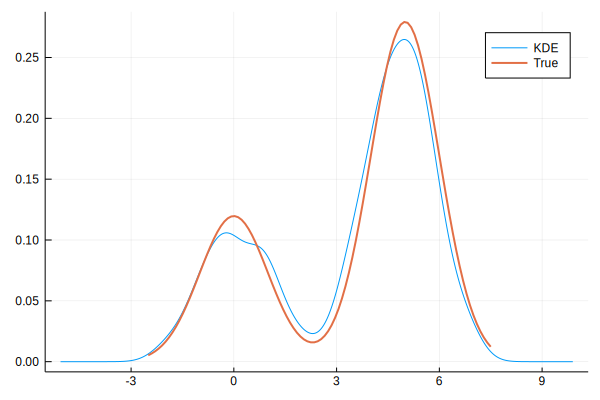

In [16]:
kerdenslscv = kde_lscv(X)
plot(kerdenslscv.x, kerdenslscv.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

In [17]:
X_with_outlier = [ X; maximum(X) + 13.5 ];

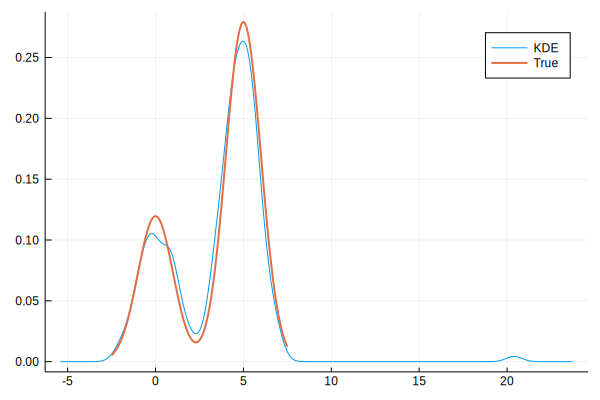

In [18]:
kerdenslscv = kde_lscv(X_with_outlier)
plot(kerdenslscv.x, kerdenslscv.density, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

## Validación cruzada con log-verosimilitud

Si se tiene una única $X\sim \mathcal{L}(f_\theta)$ entonces la log-verosimilitud está dada por $\log(f_\theta(X))$ y puede ser maximizada para estimar $\theta$. En particular para el estimador con densidad de kernel $\hat{f}_h$ se puede estimar el ancho de banda $h$. Ya que en tal caso no tenemos una observación $X$ independiente de la muestra $\left\{X_1,\ldots, X_n\right\}$ en la que se basa $\hat{f}_h$, utilizamos validación cruzado dejando una observación fuera de la muestra. y promediamos. Así las cosas se maximiza

$$
CV(h)= \frac{1}{n}\sum_{i=1}^n \log\left( \hat{f}_{-i}(X_i) \right)
$$

El uso de la validación cruzada con log-verosimilitud es suceptible a valores atípicos (outliers). También tiene el defecto de no satisfacer consistencia para densidades estándar, por ejemplo densidades con una o dos colas que decaen monotńicamente debajo de una cola exponencial.

In [4]:
using ScikitLearn

In [5]:
@sk_import neighbors: KernelDensity

PyObject <class 'sklearn.neighbors._kde.KernelDensity'>

In [6]:
@sk_import model_selection: GridSearchCV
@sk_import model_selection: LeaveOneOut

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /home/workstation/.julia/packages/ScikitLearn/NJwUf/src/Skcore.jl:179
┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore /home/workstation/.julia/packages/ScikitLearn/NJwUf/src/Skcore.jl:179


PyObject <class 'sklearn.model_selection._split.LeaveOneOut'>

In [16]:
bandwidths = 10.0.^collect(LinRange(-1, 1, 100))
migrid = GridSearchCV( KernelDensity(kernel=:gaussian), Dict( :bandwidth => bandwidths ), cv=LeaveOneOut())

PyObject GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.1450...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [17]:
X = hcat(X);

In [18]:
fit!(migrid,X)

PyObject GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.1450...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [19]:
h_opt = migrid.best_params_["bandwidth"]

0.4641588833612778

In [20]:
X_plot = hcat(range(-5, stop=10, length=1000));

In [21]:
kde = fit!(KernelDensity(kernel="gaussian", bandwidth=h_opt), X)

PyObject KernelDensity(algorithm='auto', atol=0, bandwidth=0.4641588833612778,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [22]:
kerdensloglikcv = exp.(score_samples(kde, X_plot));

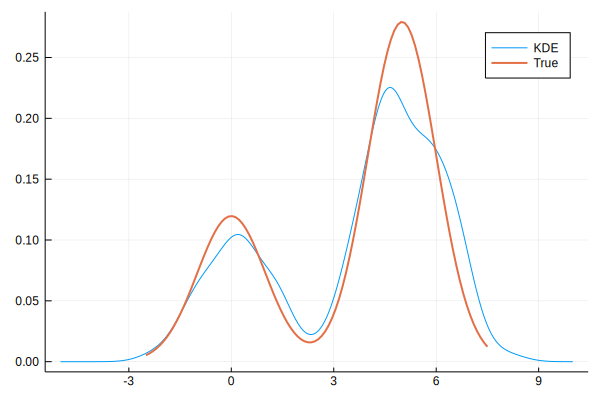

In [23]:
plot(X_plot, kerdensloglikcv, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

In [16]:
X_with_outlier = [ X; maximum(X) + 3.5 ];

In [17]:
outliergrid = GridSearchCV( KernelDensity(kernel=:gaussian), Dict( :bandwidth => bandwidths ), cv=LeaveOneOut())

ErrorException: [91mfunction Module does not accept keyword arguments[39m

In [42]:
X_with_outlier = hcat(X_with_outlier);

In [43]:
fit!(outliergrid,X_with_outlier)

PyObject GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.1450...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [44]:
h_opt_with_outlier = outliergrid.best_params_["bandwidth"]

1.7073526474706904

In [45]:
kde = fit!(KernelDensity(kernel="gaussian", bandwidth=h_opt_with_outlier), X)

PyObject KernelDensity(algorithm='auto', atol=0, bandwidth=1.7073526474706904,
              breadth_first=True, kernel='gaussian', leaf_size=40,
              metric='euclidean', metric_params=None, rtol=0)

In [46]:
kerdensloglikcv = exp.(score_samples(kde, X_plot));

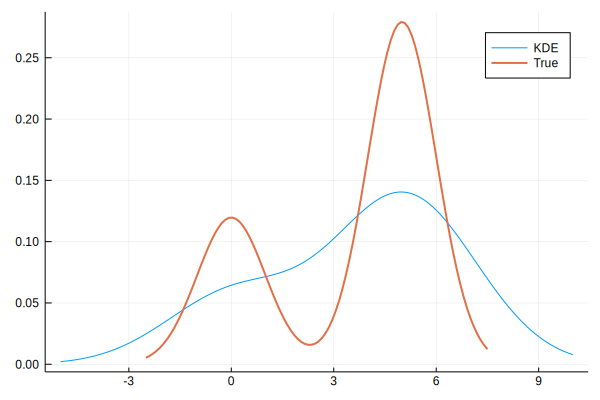

In [47]:
plot(X_plot, kerdensloglikcv, label="KDE")
plot!(LinRange(-2.5,7.5,100),pdf.(D,LinRange(-2.5,7.5,100)),linewidth=2,label="True")

## Consistencia

Si el kernel elegido par la estimación de densidades satisface

  1) $ \int K(t)\mathrm{d}t = 1 $.    $\quad\quad$       2) $ \int |K(t)| \mathrm{d}t < \infty $. $\quad\quad$ 3) $ \lim_{|t|\to 0} |tK(t)|=0$.

y el ancho de banda satisface

1) $\lim_{n\to \infty } h_n =0$. $\quad\quad$ 2) $\lim_{n\to \infty } n h_n = \infty$.


entonces (Parzen 1962)

$$
\hat{f}_{n}(x)\stackrel{p}{ \stackrel{\longrightarrow}{ _{n \to \infty} } }f(x)
$$

## Estimaciones de densidad de kernel multivariada

En analogía a la discusión anterior para $f\, : \, \mathbb{R}^d \rightarrow \mathbb{R}^+ $ una función de de densidad de probabilidad multivariada consideramos un kernel multivariado $K$ tal que

$$
\int_{\mathbb{R}^d } K(\pmb{x})\mathrm{d}\pmb{x} = 1
$$

y dada una muestra $\left\{ \pmb{X}_1, \ldots , \pmb{X}_n \right\}\stackrel{\text{i.i.d.}}{\sim}$ definimos

$$
\hat{f}_n(\pmb{x})= \frac{1}{nh^d}\sum_{i=1}^n K\left( \frac{\pmb{x}-\pmb{X}_i}{h} \right).
$$

Usualmente $K$ es unimodal y radialmente simétrico como el kernel Gaussiano multivariante estándar

$$
K(\pmb{x}) = (2\pi)^{-\frac{d}{2}}e^{-\frac{1}{2}\pmb{x}'\pmb{x}}.
$$

Para utilizar tales kerneles es recomendable transformar linealmente los datos para que tengan como matriz de varianza-covarianza empŕica a la matriz identidad. Si denotamos como $S$ a la matriz de tal transformación entonces el estimador de densidad de kernel es equivalente a utilizar

$$
\hat{f}_n(\pmb{x})= \frac{\det(S)^{-\frac{1}{2}}}{nh^d}\sum_{i=1}^n k\left( h^{-2} \left( \pmb{x}-\pmb{X}_i\right)'S^{-1}\left( \pmb{x}-\pmb{X}_i\right) \right).
$$

con $k$ dada por $k(\pmb{x}'\pmb{x})=K(\pmb{x})$. Si $S=C'DC$ con $C$ una matriz unitaria, $C'C=I=CC'$, y $D$ tal que $D^{-\frac{1}{2}}$ existe y es simétrica entonces

$$
\hat{f}_n(\pmb{x})= \frac{\det(S)^{-\frac{1}{2}}}{nh^d}\sum_{i=1}^n K\left( \frac{ D^{-\frac{1}{2}}C\left( \pmb{x}-\pmb{X}_i \right) }{h} \right).
$$

En este caso tenemos que la aproximación

\begin{align*}
\text{bias}_h(x)  \approx \frac{1}{2}h^2f''(x)\text{Var}(K)
\end{align*}
se convierte en

\begin{align*}
\text{bias}_h(\pmb{x})  \approx  h^2 \frac{1}{2} \left( \int  t_1^2 K(\pmb{t})\mathrm{d}\pmb{t} \right) \nabla^2 f(x)
\end{align*}

y 

\begin{align*}
\text{Var}\left( \hat{f}(x) \right) &  \approx \frac{1}{nh}f(x) \int K(t)^2\mathrm{d}t
\end{align*}

en

\begin{align*}
\text{Var}\left( \hat{f}(\pmb{x}) \right) &  \approx \frac{1}{nh^d} \left( \int K(\pmb{t})^2\mathrm{d}\pmb{t} \right)f(\pmb{x}) 
\end{align*}

El error medio cuadrático integrado está dado por 

$$
\frac{1}{4} \left( \int  t_1^2 K(\pmb{t})\mathrm{d}\pmb{t} \right)^2 \left( \int  \left( \nabla^2 f(\pmb{x})\right)^2 \mathrm{d}\pmb{x} \right)  + \frac{1}{nh^d} \left( \int K(\pmb{t})^2\mathrm{d}\pmb{t} \right)
$$

Y el ancho de banda óptimo por

$$
h_{opt} = \left( \frac{d\int K(\pmb{t})^2\mathrm{d}\pmb{t}}{  \left( \int  t_1^2 K(\pmb{t})\mathrm{d}\pmb{t} \right)^2 \left( \int  \left( \nabla^2 f(\pmb{x})\right)^2\mathrm{d}\pmb{x}\right) } \right)^{\frac{1}{d+4}}
$$

En el caso en que transformamos los datos (matriz covarianza identidad) y utilizamos el kernel Gaussiano multivariado estándar entonces

$$
h_{opt}= \left( \frac{4}{n(2d+1)} \right)^{\frac{1}{d+4}}
$$

Para utilizar la validación cruzada con mínimos cuadrados en el caso multivariado se minimiza

$$
M_1(h)=\frac{1}{n^2h^d}\sum_{i=1}^n\sum_{j\neq i}K^\star \left( \frac{\left( \pmb{X}_i-\pmb{X}_j \right) }{h} \right)
+\frac{2 K(\pmb{0})}{nh^d}
$$

donde $K^\star$ es la transformada de Fourier de $K$.

## Método del vecino cercano para estimación con densidad de kernel

Sea $r_k(\pmb{t})$ la distancia euclidea desde $\pmb{t}$ al k-ésimo punto más cercano en la muestra $\left\{ \pmb{X}_1 , \ldots , \pmb{X}_n \right\}$ y $V_k(\pmb{t})$ el hyper-volumen de la hyper-esfera $d$ dimensional con radio $r_k(\pmb{t})$. Si $c_d$ es el hyper-volumen de la hyper-esfera $d$ dimensional con radio uno entonces $V_k(\pmb{t})=c_dr_k(\pmb{t})^d$ y definimos al estimador de densidad de vecino cercano

$$
\hat{f}_n(\pmb{t})=\frac{k}{nV_k(\pmb{t})}=\frac{k}{nc_dr_k(\pmb{t})^d}.
$$

El estimador anterior es equivalente a considerar el kernek 

$$
K(\pmb{t})=\begin{cases}
\frac{1}{c_d} & \text{si } |\pmb{t}|\leq 1
\\ 0 & \text{en otro caso.}
\end{cases}
$$

con ancho de banda $h=r_k(\pmb{t})$.

El estimador generalizado de vecino cercano para un kernel $K$ es definido por

$$
\hat{f}_n(\pmb{t})=\frac{1}{nr_k(\pmb{t})^{-d}}\sum_{i=1}^n K\left( \frac{\pmb{t}-\pmb{X}_i}{r_k(\pmb{t})} \right).
$$

## Estimación de densidad de kernel adaptativa

1) Encuentre un estimador piloto $\tilde{f}_n(\pmb{t})$ tal que $\tilde{f}_n(\pmb{X}_i)\geq 0$ para todo $1\leq i\leq n$.

2) Defina anchos de banda local 

$$
\lambda_i = \left( \frac{\tilde{f}(\pmb{X}_i)}{g } \right)^{-\alpha}
$$

con $g$ el promedio geométrico $g=\left( \prod_{i=1}^n \tilde{f}_n(\pmb{X}_i) \right)^{\frac{1}{n}}=e^{\frac{1}{n}\sum_{i=1}^n\log\left( \tilde{f}(\pmb{X}_i) \right)}$ y $\alpha\in [0,1]$ un parámetro de sesnibilidad.

3) Dado un kernel que integra 1 $K$ y un ancho de banda $h>0$ definimos el estimador de densidad de kernel adaptativo

$$
\hat{f}_n(\pmb{x}) = \frac{1}{n}\sum_{i=1}^n \frac{1}{h^{d}\lambda_i^{d}}K\left( \frac{\pmb{x}-\pmb{X}_i}{h^{d}\lambda_i^{d}} \right)
$$

In [2]:
using StatsBase, Distributions, Plots

In [292]:
X = rand(LogNormal(0.0,0.7),200) .+ 1.0
h_silv = 0.9*min( iqr(X), std(X) )*(1.0/length(X))^(1.0/5.0)

0.32847533667253426

In [293]:
mean(X)

2.3496691854158724

In [294]:
# Epanechnikov kernel
kerepa(x) = abs(x) < sqrt(5) ? ( 3.0/( 4.0*sqrt(5) ) )*( 1.0 - x.^2 / 5.0 ) : 0
# KDE estim
mi_KDE(x, h, X, K) = ( 1.0/( length(X) * h) ) * sum( K.( (x .- X) ./ h) )
# adaptive bandwidths
λ_adapt(X,h,K,g,α) = [ ( g/mi_KDE( x, h, X, K ) )^α for x in X ]
# adaptive KDE estim
function adpt_KDE(x,h,X,K,α)
    g = geomean( [mi_KDE(x,h,X,K) for x in X] )
    λ = λ_adapt(X,h,K,g,α)
    return ( 1.0/( length(X) * h) ) * sum( (K.( ((x .- X)./λ) ./ h)./λ) )
end

adpt_KDE (generic function with 1 method)

In [295]:
# definimos malla
x_mesh = LinRange(0,10,200)
# densidad KDE
dens = [ mi_KDE( x, h_silv, X, kgauss) for x in x_mesh ]
# densidad KDE adapt
dens_adpt = [ adpt_KDE( x, h_silv, X, kgauss, 0.5) for x in x_mesh ];

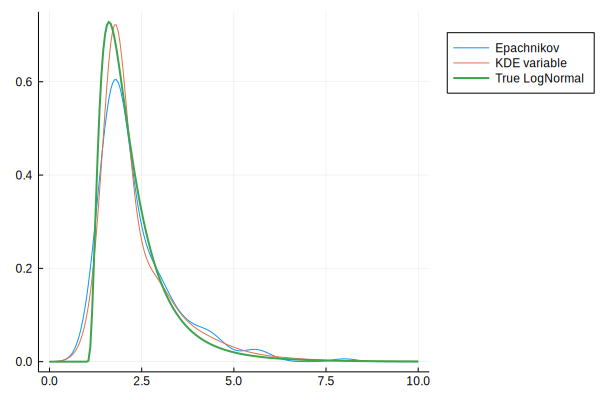

In [297]:
plot(x_mesh, dens, label = "Epachnikov", legend=:outertopright)
plot!(x_mesh, dens_adpt, label = "KDE variable")
plot!( x_mesh, pdf.( LogNormal(0.0,0.7), x_mesh .- 1.0),linewidth=2,label="True LogNormal")

In [272]:
# define some kernels:
# gaussian kernel
kgauss(x) = 1/sqrt(2π) * exp(- 0.5 * x^2)
# boxcar
kbox(x) = abs(x) <= 1 ? 1/2 : 0
# triangular
ktri(x) = abs(x) <= 1 ? 1 - abs(x) : 0

ktri (generic function with 1 method)

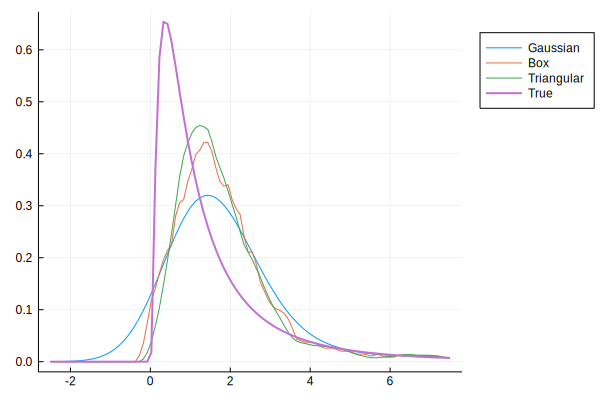

In [210]:
# define the KDE function
KDE(x, h, xi, K) =
  1/(length(xi) * h) * sum( K.((x .- xi) / h))

# definimos malla
x_mesh = LinRange(-2.5,7.5,100)

# evaluate KDE along the x-axis using comprehensions
dens = [ KDE( x, sqrt(0.75), X, K) for x in x_mesh, K in (kgauss, kbox, ktri)]

# visualize the kernels
plot(x_mesh, dens, label = ["Gaussian" "Box" "Triangular"], legend=:outertopright)
plot!(LinRange(-2.5,7.5,100),pdf.(LogNormal(),LinRange(-2.5,7.5,100)),linewidth=2,label="True")